In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model
import numpy as np
import datetime, os
from google.colab import files
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)

In [2]:
#%load_ext tensorboard
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#%tensorboard --logdir logs

In [3]:
def modelFactory():
  models = []

  model1 = Sequential(name='single_bidirectional_lstm_100_embedding_128_DO_0.2')
  model1.add(Embedding(input_dim=total_words, output_dim=128, input_length=max_sequence_len-1))
  model1.add(Bidirectional(LSTM(100)))
  model1.add(Dropout(0.2))
  model1.add(Dense(total_words, activation='softmax'))
  model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  models.append(model1)

  model2 = Sequential(name='single_bidirectional_lstm_100_embedding_256_DO_0.2')
  model2.add(Embedding(input_dim=total_words, output_dim=256, input_length=max_sequence_len-1))
  model2.add(Bidirectional(LSTM(100)))
  model2.add(Dropout(0.2))
  model2.add(Dense(total_words, activation='softmax'))
  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  models.append(model2)

  model3 = Sequential(name='single_bidirectional_lstm_100_embedding_512_DO_0.2')
  model3.add(Embedding(input_dim=total_words, output_dim=512, input_length=max_sequence_len-1))
  model3.add(Bidirectional(LSTM(100)))
  model3.add(Dropout(0.2))
  model3.add(Dense(total_words, activation='softmax'))
  model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  models.append(model3)

  model4 = Sequential(name='single_bidirectional_lstm_100_embedding_1024_DO_0.2')
  model4.add(Embedding(input_dim=total_words, output_dim=1024, input_length=max_sequence_len-1))
  model4.add(Bidirectional(LSTM(100)))
  model4.add(Dropout(0.2))
  model4.add(Dense(total_words, activation='softmax'))
  model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  models.append(model4)

  #model1 = Sequential(name='single_bidirectional_lstm_20_embedding_64_sklearn_tts_DO_0.2')
  #model1.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  #model1.add(Bidirectional(LSTM(20)))
  #model1.add(Dropout(0.2))
  #model1.add(Dense(total_words, activation='softmax'))
  #model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model1)

  #model2 = Sequential(name='single_bidirectional_lstm_100_embedding_64_sklearn_tts_DO_0.2')
  #model2.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  #model2.add(Bidirectional(LSTM(100)))
  #model2.add(Dropout(0.2))
  #model2.add(Dense(total_words, activation='softmax'))
  #model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model2)

  #model3 = Sequential(name='single_bidirectional_lstm_20_embedding_128_sklearn_tts_DO_0.2')
  #model3.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
  #model3.add(Bidirectional(LSTM(20)))
  #model3.add(Dropout(0.2))
  #model3.add(Dense(total_words, activation='softmax'))
  #model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model3)

  #model4 = Sequential(name='single_bidirectional_lstm_100_embedding_256_sklearn_tts_DO_0.2')
  #model4.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
  #model4.add(Bidirectional(LSTM(100)))
  #model4.add(Dropout(0.2))
  #model4.add(Dense(total_words, activation='softmax'))
  #model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model4)

  #model5 = Sequential(name='single_bidirectional_lstm_256_embedding_256_sklearn_tts_DO_0.2')
  #model5.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
  #model5.add(Bidirectional(LSTM(256)))
  #model5.add(Dropout(0.2))
  #model5.add(Dense(total_words, activation='softmax'))
  #model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model5)

  #model5 = Sequential(name='double_bidirectional_lstm_20_embedding_64_sklearn_tts_DO_0.2')
  #model5.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  #model5.add(Bidirectional(LSTM(20,return_sequences=True)))
  #model5.add(Dropout(0.2))
  #model5.add(LSTM(20))
  #model5.add(Dropout(0.2))
  #model5.add(Dense(total_words, activation='softmax'))
  #model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model5)

  #model6 = Sequential(name='double_bidirectional_lstm_100_embedding_64_sklearn_tts_DO_0.2')
  #model6.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  #model6.add(Bidirectional(LSTM(100,return_sequences=True)))
  #model6.add(Dropout(0.2))
  #model6.add(LSTM(100))
  #model6.add(Dropout(0.2))
  #model6.add(Dense(total_words, activation='softmax'))
  #model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model6)

  #model2 = Sequential(name='single_bidirectional_lstm_100_embedding_32')
  #model2.add(Embedding(total_words, 32, input_length=max_sequence_len-1))
  #model2.add(Bidirectional(LSTM(100)))
  #model2.add(Dropout(0.2))
  #model2.add(Dense(total_words, activation='softmax'))
  #model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model2)

  #model4 = Sequential(name='single_lstm_25')
  #model4.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  #model4.add(LSTM(25))
  #model4.add(Dropout(0.2))
  #model4.add(Dense(total_words, activation='softmax'))
  #model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #models.append(model4)

  return models


In [4]:
kisscorpus = pickle.load(open('kiss_clean.pkl', "rb"))

In [5]:
#kisscorpus

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(kisscorpus) 
total_words = len(tokenizer.word_index) + 1

In [7]:
total_words

2681

In [8]:
input_sequences = []

for line in kisscorpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [9]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [10]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(xs, ys, test_size=0.2, shuffle=True, random_state=42)

In [12]:
models = modelFactory()

Epoch 1/100
1057/1057 - 15s - loss: 5.6495 - accuracy: 0.0656 - val_loss: 5.3071 - val_accuracy: 0.1076
Epoch 2/100
1057/1057 - 11s - loss: 4.8918 - accuracy: 0.1553 - val_loss: 4.8159 - val_accuracy: 0.1830
Epoch 3/100
1057/1057 - 11s - loss: 4.3829 - accuracy: 0.2141 - val_loss: 4.5431 - val_accuracy: 0.2202
Epoch 4/100
1057/1057 - 11s - loss: 4.0257 - accuracy: 0.2514 - val_loss: 4.3774 - val_accuracy: 0.2499
Epoch 5/100
1057/1057 - 11s - loss: 3.7479 - accuracy: 0.2856 - val_loss: 4.2616 - val_accuracy: 0.2678
Epoch 6/100
1057/1057 - 11s - loss: 3.5197 - accuracy: 0.3102 - val_loss: 4.1832 - val_accuracy: 0.2853
Epoch 7/100
1057/1057 - 11s - loss: 3.3208 - accuracy: 0.3342 - val_loss: 4.1302 - val_accuracy: 0.3080
Epoch 8/100
1057/1057 - 11s - loss: 3.1471 - accuracy: 0.3590 - val_loss: 4.0955 - val_accuracy: 0.3148
Epoch 9/100
1057/1057 - 11s - loss: 2.9920 - accuracy: 0.3792 - val_loss: 4.0793 - val_accuracy: 0.3262
Epoch 10/100
1057/1057 - 11s - loss: 2.8552 - accuracy: 0.3997 -

INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_128_DO_0.2/assets


INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_128_DO_0.2/assets


Epoch 1/100
1057/1057 - 16s - loss: 5.5408 - accuracy: 0.0852 - val_loss: 5.0982 - val_accuracy: 0.1517
Epoch 2/100
1057/1057 - 13s - loss: 4.6838 - accuracy: 0.1870 - val_loss: 4.6548 - val_accuracy: 0.1993
Epoch 3/100
1057/1057 - 13s - loss: 4.2086 - accuracy: 0.2325 - val_loss: 4.4425 - val_accuracy: 0.2224
Epoch 4/100
1057/1057 - 13s - loss: 3.8741 - accuracy: 0.2690 - val_loss: 4.3067 - val_accuracy: 0.2555
Epoch 5/100
1057/1057 - 13s - loss: 3.6068 - accuracy: 0.3015 - val_loss: 4.1956 - val_accuracy: 0.2825
Epoch 6/100
1057/1057 - 13s - loss: 3.3785 - accuracy: 0.3299 - val_loss: 4.1164 - val_accuracy: 0.2946
Epoch 7/100
1057/1057 - 13s - loss: 3.1782 - accuracy: 0.3584 - val_loss: 4.0801 - val_accuracy: 0.3148
Epoch 8/100
1057/1057 - 13s - loss: 3.0031 - accuracy: 0.3800 - val_loss: 4.0516 - val_accuracy: 0.3264
Epoch 9/100
1057/1057 - 13s - loss: 2.8500 - accuracy: 0.4001 - val_loss: 4.0271 - val_accuracy: 0.3381
Epoch 10/100
1057/1057 - 13s - loss: 2.7163 - accuracy: 0.4200 -

INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_256_DO_0.2/assets


INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_256_DO_0.2/assets


Epoch 1/100
1057/1057 - 23s - loss: 5.4515 - accuracy: 0.1072 - val_loss: 4.9601 - val_accuracy: 0.1673
Epoch 2/100
1057/1057 - 19s - loss: 4.5566 - accuracy: 0.2017 - val_loss: 4.5613 - val_accuracy: 0.2112
Epoch 3/100
1057/1057 - 19s - loss: 4.0781 - accuracy: 0.2496 - val_loss: 4.3437 - val_accuracy: 0.2462
Epoch 4/100
1057/1057 - 19s - loss: 3.7297 - accuracy: 0.2885 - val_loss: 4.1920 - val_accuracy: 0.2761
Epoch 5/100
1057/1057 - 19s - loss: 3.4529 - accuracy: 0.3219 - val_loss: 4.1045 - val_accuracy: 0.2948
Epoch 6/100
1057/1057 - 19s - loss: 3.2282 - accuracy: 0.3515 - val_loss: 4.0394 - val_accuracy: 0.3153
Epoch 7/100
1057/1057 - 19s - loss: 3.0258 - accuracy: 0.3809 - val_loss: 4.0147 - val_accuracy: 0.3275
Epoch 8/100
1057/1057 - 19s - loss: 2.8474 - accuracy: 0.4048 - val_loss: 3.9918 - val_accuracy: 0.3398
Epoch 9/100
1057/1057 - 19s - loss: 2.6895 - accuracy: 0.4242 - val_loss: 3.9909 - val_accuracy: 0.3498
Epoch 10/100
1057/1057 - 19s - loss: 2.5527 - accuracy: 0.4470 -

INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_512_DO_0.2/assets


INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_512_DO_0.2/assets


Epoch 1/100
1057/1057 - 35s - loss: 5.3571 - accuracy: 0.1241 - val_loss: 4.8664 - val_accuracy: 0.1794
Epoch 2/100
1057/1057 - 31s - loss: 4.4490 - accuracy: 0.2161 - val_loss: 4.4971 - val_accuracy: 0.2212
Epoch 3/100
1057/1057 - 31s - loss: 3.9835 - accuracy: 0.2621 - val_loss: 4.2949 - val_accuracy: 0.2553
Epoch 4/100
1057/1057 - 32s - loss: 3.6383 - accuracy: 0.2989 - val_loss: 4.1668 - val_accuracy: 0.2808
Epoch 5/100
1057/1057 - 32s - loss: 3.3626 - accuracy: 0.3338 - val_loss: 4.0853 - val_accuracy: 0.3067
Epoch 6/100
1057/1057 - 31s - loss: 3.1332 - accuracy: 0.3645 - val_loss: 4.0348 - val_accuracy: 0.3182
Epoch 7/100
1057/1057 - 32s - loss: 2.9412 - accuracy: 0.3884 - val_loss: 4.0002 - val_accuracy: 0.3333
Epoch 8/100
1057/1057 - 32s - loss: 2.7692 - accuracy: 0.4133 - val_loss: 3.9949 - val_accuracy: 0.3451
Epoch 9/100
1057/1057 - 31s - loss: 2.6211 - accuracy: 0.4335 - val_loss: 3.9987 - val_accuracy: 0.3560
Epoch 10/100
1057/1057 - 31s - loss: 2.4827 - accuracy: 0.4542 -

INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_1024_DO_0.2/assets


INFO:tensorflow:Assets written to: single_bidirectional_lstm_100_embedding_1024_DO_0.2/assets


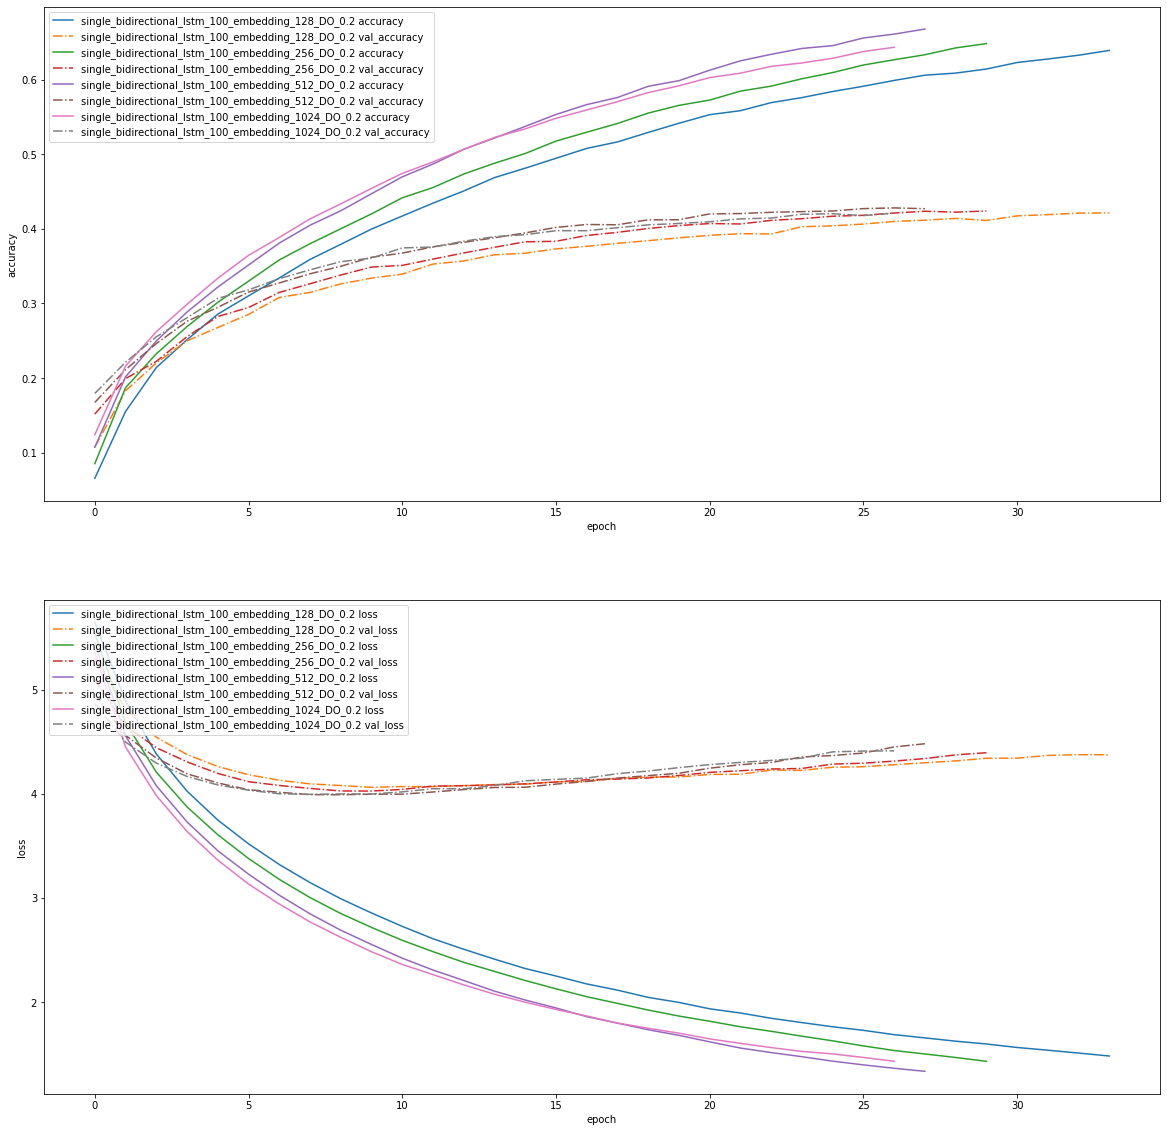

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(20,20)

for model in models:
  filepath = model.name
  #callbacks = [TensorBoard(log_dir=logdir,
  #                       histogram_freq=1,
  #                       write_graph=True,
  #                       write_images=True,
  #                       update_freq='epoch',
  #                       profile_batch=2,
  #                       embeddings_freq=1),ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')]
  #callbacks = [ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')]
  callbacks = [EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1, mode='max')]
  #history = model.fit(xs, ys, epochs=100, validation_split=0.2, verbose=2)
  history = model.fit(xtrain, ytrain, epochs=100, validation_data=(xtest,ytest), callbacks=[callbacks], verbose=2)
  axes[0].plot(history.history['accuracy'], label=model.name +' accuracy')
  axes[0].plot(history.history['val_accuracy'], label=model.name +' val_accuracy', linestyle = '-.')
  axes[1].plot(history.history['loss'], label=model.name +' loss')
  axes[1].plot(history.history['val_loss'], label=model.name +' val_loss', linestyle = '-.')
  model.save(model.name)


axes[0].set(xlabel="epoch", ylabel="accuracy")
axes[1].set(xlabel="epoch", ylabel="loss")
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
fig.savefig('kiss_model_eval.png', bbox_inches="tight")
plt.show()
files.download('kiss_model_eval.png')

  #with open(model.name + '._history.pkl', 'wb') as file_pi:
  #      pickle.dump(history.history, file_pi)
  #files.download(model.name+'._history.pkl')
  #
  

In [14]:
input_phrase = "Baby"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([input_phrase])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
  #predicted = np.random.choice(len(model.predict(token_list)))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	input_phrase += " " + output_word
print(input_phrase)

Baby will not you give it to me one time i know and there is no wrong and i will be right to be mine yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah yeah innocent pushing heart matters habit hunting illusions yeah mommy sixteen pushing sixteen russian already already understood fees sink fake whatever fun bein jack yesterday them slow ahead trusted because loves turned betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed betrayed yeah yeah


In [26]:
!zip -r single_bidirectional_lstm_100_embedding_1024_DO_0.2.zip single_bidirectional_lstm_100_embedding_1024_DO_0.2

  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/assets/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/variables/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/variables/variables.index (deflated 65%)
  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: single_bidirectional_lstm_100_embedding_1024_DO_0.2/saved_model.pb (deflated 90%)


In [25]:
!zip -r single_bidirectional_lstm_100_embedding_128_DO_0.2.zip single_bidirectional_lstm_100_embedding_128_DO_0.2

  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/assets/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/variables/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/variables/variables.index (deflated 65%)
  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: single_bidirectional_lstm_100_embedding_128_DO_0.2/saved_model.pb (deflated 90%)


In [24]:
!zip -r single_bidirectional_lstm_100_embedding_256_DO_0.2.zip single_bidirectional_lstm_100_embedding_256_DO_0.2

  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/assets/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/variables/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/variables/variables.index (deflated 65%)
  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: single_bidirectional_lstm_100_embedding_256_DO_0.2/saved_model.pb (deflated 90%)


In [23]:
!zip -r single_bidirectional_lstm_100_embedding_512_DO_0.2.zip single_bidirectional_lstm_100_embedding_512_DO_0.2

  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/assets/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/variables/ (stored 0%)
  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/variables/variables.index (deflated 65%)
  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: single_bidirectional_lstm_100_embedding_512_DO_0.2/saved_model.pb (deflated 91%)
